In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
directory_path = 'F:/Unemployment in India'
files_in_directory = os.listdir(directory_path)
print(files_in_directory)

['Unemployment in India.csv']


In [3]:
directory_path = 'F:/Unemployment in India'
files_in_directory = os.listdir(directory_path)
csv_file = [file for file in files_in_directory if file.endswith('.csv')][0]
file_path = os.path.join(directory_path, csv_file)
df = pd.read_csv(file_path)
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [4]:
df.tail()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN
767,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_shape = df.shape
print(df_shape)

(768, 7)


In [6]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [7]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [9]:
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [10]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [11]:
df_cleaned = df.dropna()

In [12]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
df_filled = df.copy()
df_filled[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

In [13]:
print(df_filled.dtypes)

Region                                       object
 Date                                        object
 Frequency                                   object
 Estimated Unemployment Rate (%)            float64
 Estimated Employed                         float64
 Estimated Labour Participation Rate (%)    float64
Area                                         object
dtype: object


In [14]:
import plotly.express as px 

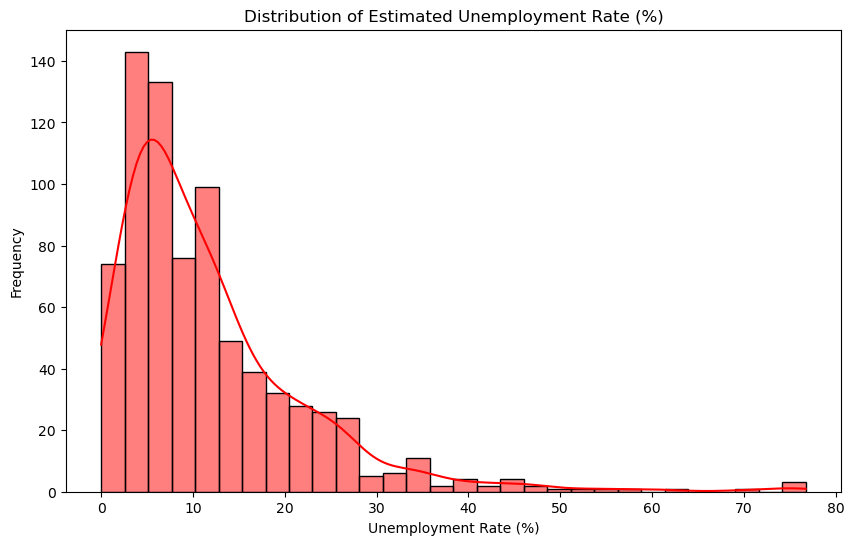

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(df_filled[' Estimated Unemployment Rate (%)'], bins=30, kde=True , color='red')
plt.title('Distribution of Estimated Unemployment Rate (%)')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Frequency')
plt.show()

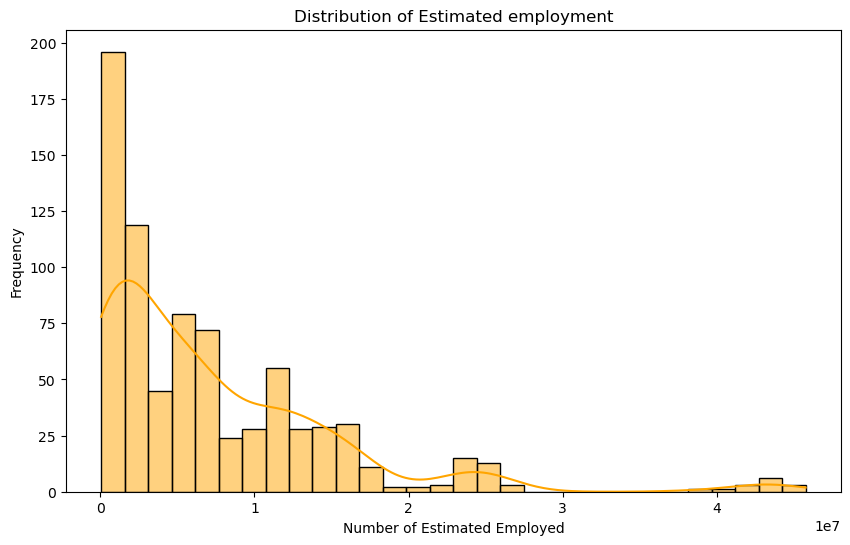

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(df_filled[' Estimated Employed'], bins=30, kde=True, color='orange')
plt.title('Distribution of Estimated employment')
plt.xlabel('Number of Estimated Employed')
plt.ylabel('Frequency')
plt.show()

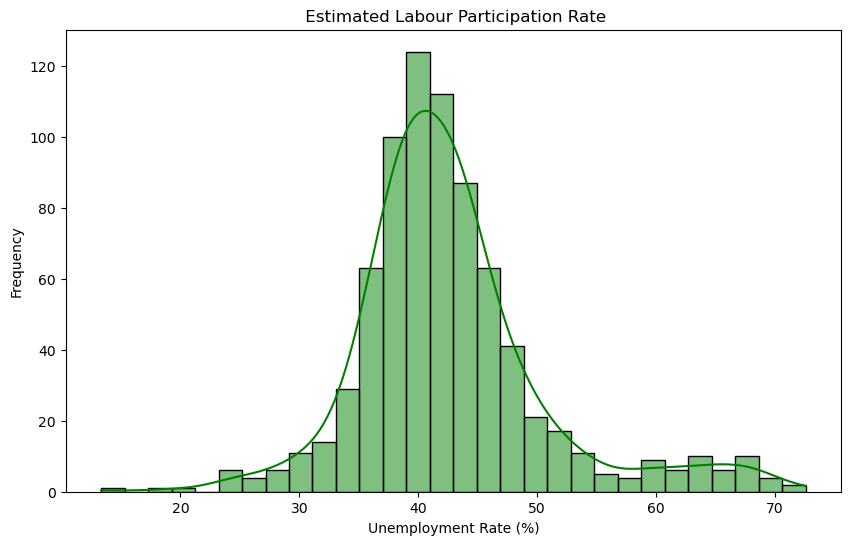

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(df_filled[' Estimated Labour Participation Rate (%)'], bins=30, kde=True , color='green')
plt.title(' Estimated Labour Participation Rate')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Frequency')
plt.show()

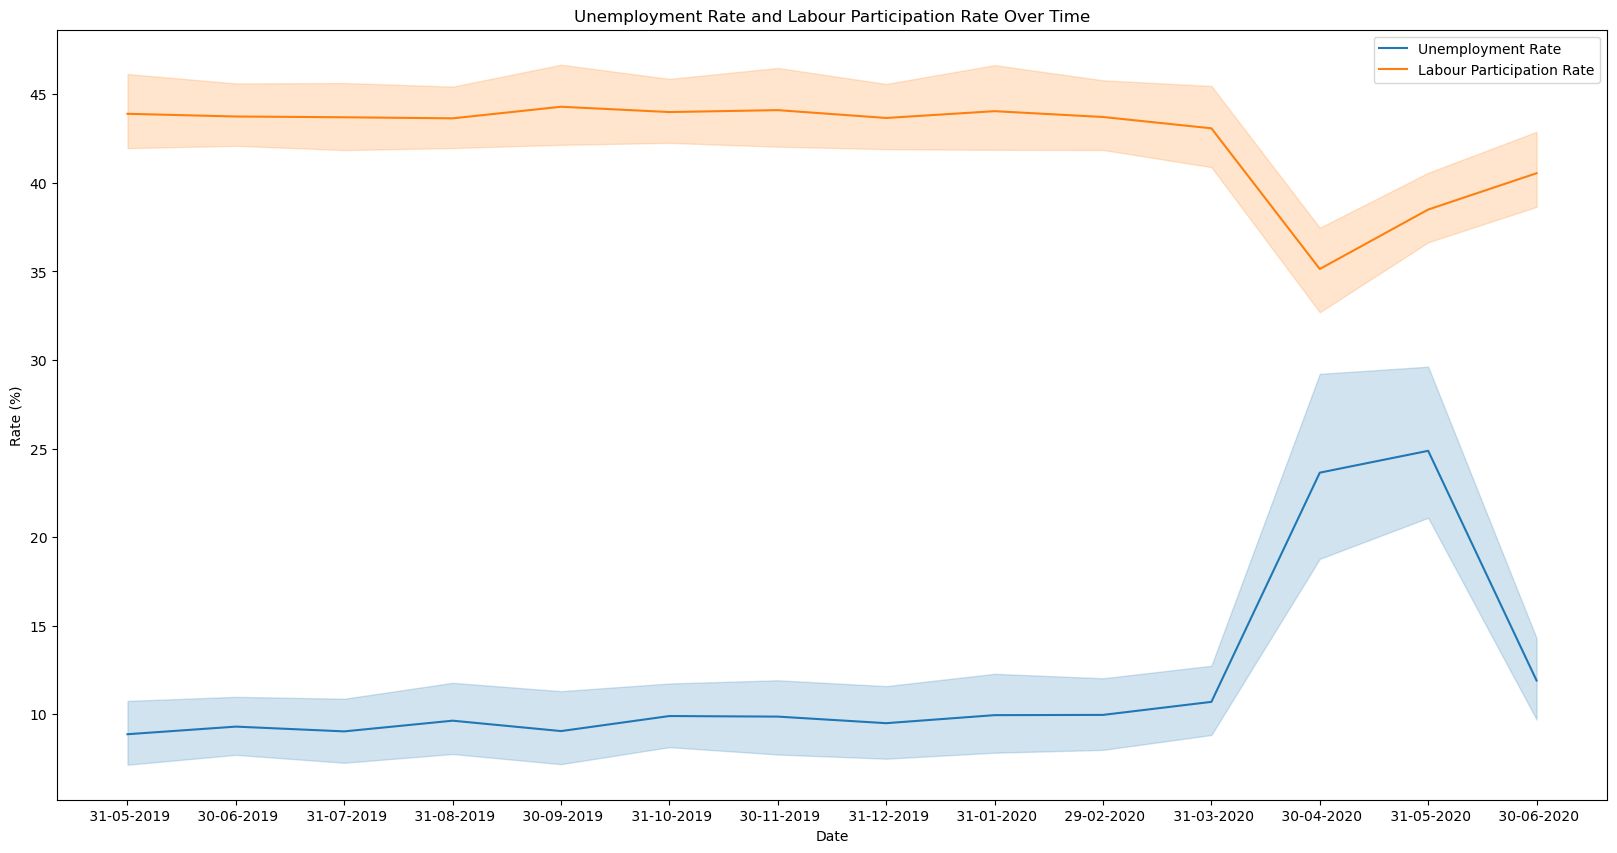

In [21]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=df, x=' Date', y=' Estimated Unemployment Rate (%)', label='Unemployment Rate')
sns.lineplot(data=df, x=' Date', y=' Estimated Labour Participation Rate (%)', label='Labour Participation Rate')
plt.title('Unemployment Rate and Labour Participation Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Rate (%)')
plt.legend()
plt.show()